# Aviation Accident Analysis

## Business Understanding
**Goal**: Identify lowest-risk aircraft for company expansion  
**Stakeholder**: Head of Aviation Division  
**Key Questions**:  
1. Which aircraft models have the fewest accidents?  
2. What factors correlate with safety?  

# SETUP

In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Reading the data from CSV file and specifies the encoding to use 

df = pd.read_csv('AviationData.csv', encoding='latin1', on_bad_lines='skip')  # tell pandas to skip corrupt rows
df.head()

<ipython-input-14-401ef945b385>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1', on_bad_lines='skip')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
# Diplaying the data in the dataframe

print(df.shape)
df.head(3)

(88889, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


# DATA CLEANING

In [ ]:
print(df.columns.tolist())   #print a list of all column names

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [ ]:
# Select relevant columns

cols = ['Event.Date', 'Aircraft.Category', 'Make', 'Model',        # create a list called cols
        'Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
        'Broad.phase.of.flight', 'Weather.Condition']
df = df[cols].copy()                                               # create a new dataframe containing all the above columns

In [ ]:
# Convert date

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')


In [ ]:
# Handle missing values

df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unknown')

In [ ]:
# Filter only airplanes

df = df[df['Aircraft.Category'].str.contains('Airplane', case=False, na=False)]

# ANALYSIS

In [ ]:
# Extract year
df['Year'] = df['Event.Date'].dt.year  #created a new column "year"

In [ ]:
# Top 10 safest aircraft models

safest = df.groupby(['Make', 'Model']).agg(         # group data by make and model
    Total_Accidents=('Model', 'count'),             # count of all accidents
    Fatal_Accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum())  # count of accidents with fatalities
).sort_values('Fatal_Accidents').head(10)           # sort by fewest fatal accidents and returns the top 10 safest


In [ ]:
# Accident trends by year

yearly_trends = df.groupby('Year').size()

In [ ]:
 # Accident causes

phase_stats = df['Broad.phase.of.flight'].value_counts()  #counts accidents by flight phase(takeoff,landaing)
weather_stats = df['Weather.Condition'].value_counts()    # count accidents by weather conditions

# VISUALIZATIONS

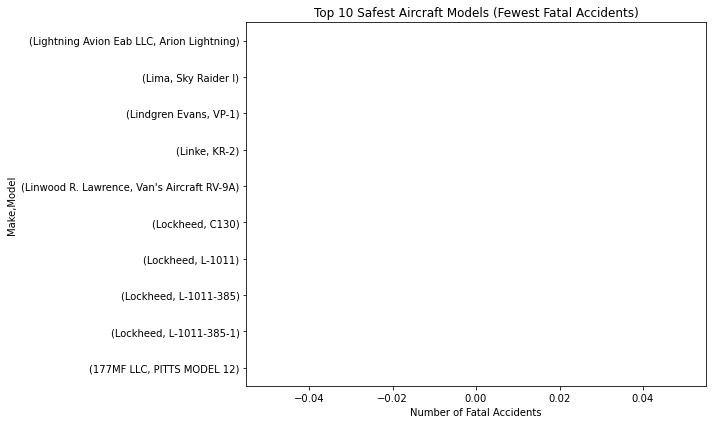

In [ ]:
# Safest aircraft models 

plt.figure(figsize=(10,6))
safest['Fatal_Accidents'].sort_values().plot(kind='barh')   #create horizontal bar from safets dataframe showing top 10 aircrafts with fewest fatal accidents
plt.title('Top 10 Safest Aircraft Models (Fewest Fatal Accidents)')
plt.xlabel('Number of Fatal Accidents')
plt.tight_layout()
plt.show()

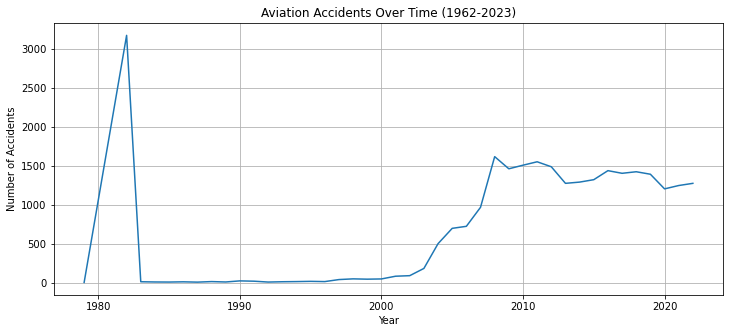

In [ ]:
# Yearly accident trend 
# create a line plot showing trend of aviation accidents over time

plt.figure(figsize=(12,5))   
yearly_trends.plot()
plt.title('Aviation Accidents Over Time (1962-2023)')
plt.ylabel('Number of Accidents')
plt.grid(True)   #grid lines for easier reading
plt.show()

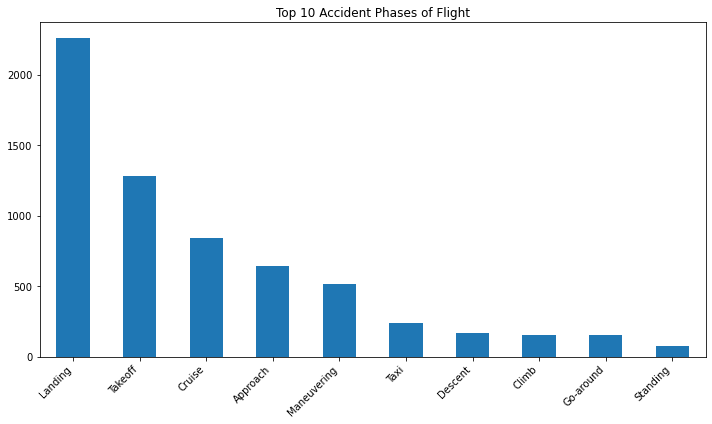

In [ ]:
# Accident phase distribution 

plt.figure(figsize=(10,6))
phase_stats.head(10).plot(kind='bar')
plt.title('Top 10 Accident Phases of Flight')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# TABLEAU

In [31]:
# Save cleaned data for Tableau
df.to_csv('data/cleaned_aviation_data.csv', index=False)